This dataset consists of 6000 GeoTIFFs produced by the Geophysical Institute Permafrost Lab (GIPL) Permafrost Model. Six distinct CMIP5 model-scenario combinations were used to force the GIPL model output.

Each model-scenario combination includes annual (2021-2120) summaries of the following ten variables:

- Mean Annual Ground Temperature (MAGT) at 0.5 m below the surface (°C)
- MAGT at 1 m below the surface (°C)
- MAGT at 2 m below the surface (°C)
- MAGT at 3 m below the surface (°C)
- MAGT at 4 m below the surface (°C)
- MAGT at 5 m below the surface (°C)
- Mean Annual Surface (i.e., 0.01 m depth) Temperature (°C)
- Permafrost top (upper boundary of the permafrost, depth below the surface in m)
- Permafrost base (lower boundary of the permafrost, depth below the surface in m)
- Talik thickness (perennially unfrozen ground occurring in permafrost terrain, m)

There are 1000 GeoTIFF files per model-scenario combination.

These model-scenario combinations are:

- GFDL-CM3, RCP 4.5
- GFDL-CM3, RCP 8.5
- NCAR-CCSM4, RCP 4.5
- NCAR-CCSM4, RCP 8.5
- A 5-Model (GFDL-CM3, NCAR-CCSM4, GISS-E2-R, IPSL-CM5A-LR, MRI-CGCM3) Average, RCP 8.5
- A 5-Model (GFDL-CM3, NCAR-CCSM4, GISS-E2-R, IPSL-CM5A-LR, MRI-CGCM3) Average, RCP 4.5

The file naming convention is `gipl_model_scenario_variable_year.tif`

for example:
`gipl_GFDL-CM3_rcp45_talikthickness_m_2090.tif`

Each GeoTIFF uses the Alaska Albers (EPSG:3338) projection and has a spatial resolution of 1 km x 1 km. The metadata object for the raster data looks like this:

All rasters in this dataset have indentical extents, spatial references, and metadata objects.

Once extracted, the entire dataset (all 6000 GeoTIFFs) requires 39 GB of disk space.

Data are compressed into ten .zip files, one per variable. Each archive will contain all model-scenario combinations and all years for that variable. Each .zip file contains 600 GeoTIFFs.

Credit: Dr. Sergey Marchenko

Suggested SNAP Data Catalog Path: `/workspace/CKAN/CKAN_Data/Base/AK_1km/GIPL/`

Suggested tags / keywords: permafrost, modeled, projected,  CMIP5, modeled

In [59]:
# Create a preview image for the SNAP Data Catalog
import matplotlib.pyplot as plt
import rasterio as rio
import numpy as np
import os
from pathlib import Path
from rasterio.plot import show
os.environ["OUTPUT_DIR"] = (os.getenv("OUTPUT_DIR") or "/atlas_scratch/cparr4/new_gipl_eda_marchenko_revision/crrel_gipl_outputs/")
output_path = Path(os.environ["OUTPUT_DIR"])


magt2m = output_path / "gipl_GFDL-CM3_rcp85_magt2m_degC_2090.tif"
base = output_path / "gipl_GFDL-CM3_rcp85_permafrostbase_m_2090.tif"
top = output_path / "gipl_GFDL-CM3_rcp85_permafrosttop_m_2090.tif"
talik = output_path / "gipl_GFDL-CM3_rcp85_talikthickness_m_2090.tif"

plot_di = {}

plot_di["Mean Annual Ground Temperature at 2 m Depth (°C)"] = {}
plot_di["Mean Annual Ground Temperature at 2 m Depth (°C)"]["fp"] = magt2m
plot_di["Mean Annual Ground Temperature at 2 m Depth (°C)"]["cmap"] = "magma"

plot_di["Permafrost Upper Boundary (Top) Depth (m)"] = {}
plot_di["Permafrost Upper Boundary (Top) Depth (m)"]["fp"] = top
plot_di["Permafrost Upper Boundary (Top) Depth (m)"]["cmap"] = "winter"

plot_di["Permafrost Lower Boundary (Base) Depth (m)"] = {}
plot_di["Permafrost Lower Boundary (Base) Depth (m)"]["fp"] = base
plot_di["Permafrost Lower Boundary (Base) Depth (m)"]["cmap"] = "winter"

plot_di["Talik Thickness (m)"] = {}
plot_di["Talik Thickness (m)"]["fp"] = talik
plot_di["Talik Thickness (m)"]["cmap"] = "gist_heat"

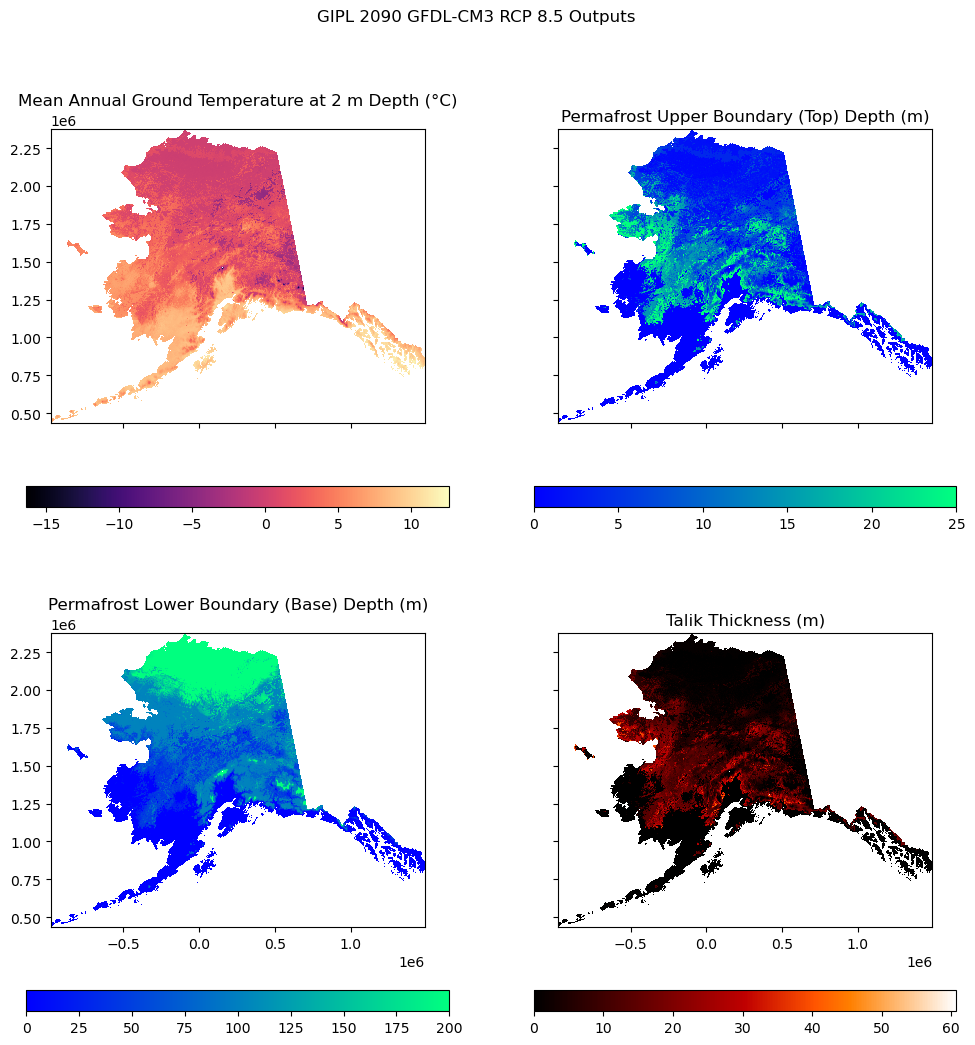

In [63]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12, 12))
plt.suptitle("GIPL 2090 GFDL-CM3 RCP 8.5 Outputs")
for k, ax in zip(plot_di.keys(), axes.flatten()):
    with rio.open(plot_di[k]["fp"]) as src:
        arr = src.read(1)
        vmin = np.nanmin(arr)
        if "Base" in k:
            vmax = 200
        elif "Top" in k:
            vmax = 25
        else:
            vmax = np.nanmax(arr)
        im = show(src, ax=ax, interpolation="none",
                  cmap=plot_di[k]["cmap"], vmax=vmax)
        plt.colorbar(im.get_children()[0], ax=ax, orientation="horizontal")
        ax.set_title(k)
plt.savefig("GIPL_2090_GFDL-CM3_RCP8.5_Output_preview.png", bbox_inches="tight", dpi=200)
